In [224]:
#import what needs to be imported for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [113]:
# read in csv
SSA_data_dirt = pd.read_csv('SSA-SA-FYWL.csv')

SSA_data=SSA_data_dirt.drop('State Code'=='PR')

In [114]:
#Give adding details that will be important for plotting later on.

# get 50 different colors
N = len(np.unique(SSA_data['State Code']))
StateColors = {
    'Colors': np.random.random(N),
    'State Code': np.unique(SSA_data['State Code'])
}
StateColorMap = pd.DataFrame(StateColors)
# merge
SSA_data = pd.merge(SSA_data, StateColorMap, on = 'State Code', how = "left")

# convert date to numeric
SSA_data['Date_numeric'] = pd.to_numeric(SSA_data['Date'])


In [115]:
#Grouping frames by Regions

#regional dataframes
atl=SSA_data.loc[SSA_data['Region Code']=='ATL']
bos=SSA_data.loc[SSA_data['Region Code']=='BOS']
chi=SSA_data.loc[SSA_data['Region Code']=='CHI']
dal=SSA_data.loc[SSA_data['Region Code']=='DAL']
den=SSA_data.loc[SSA_data['Region Code']=='DEN']
kcm=SSA_data.loc[SSA_data['Region Code']=='KCM']
nyc=SSA_data.loc[SSA_data['Region Code']=='NYC']
phl=SSA_data.loc[SSA_data['Region Code']=='PHL']
sea=SSA_data.loc[SSA_data['Region Code']=='SEA']
sfo=SSA_data.loc[SSA_data['Region Code']=='SFO']

#list of regions
regions=[atl,bos,chi,dal,den,kcm,nyc,phl,sea,sfo]

In [207]:
#ATL states as individual dataframes
AL=SSA_data.loc[SSA_data['State Code']=='AL ']
FL=SSA_data.loc[SSA_data['State Code']=='FL ']
GA=SSA_data.loc[SSA_data['State Code']=='GA ']
KY=SSA_data.loc[SSA_data['State Code']=='KY ']
MS=SSA_data.loc[SSA_data['State Code']=='MS ']
NC=SSA_data.loc[SSA_data['State Code']=='NC ']
SC=SSA_data.loc[SSA_data['State Code']=='SC ']
TN=SSA_data.loc[SSA_data['State Code']=='TN ']



In [118]:
#BOS as individual dataframes

MA=SSA_data.loc[SSA_data['State Code']=='MA ']
ME=SSA_data.loc[SSA_data['State Code']=='ME ']
NH=SSA_data.loc[SSA_data['State Code']=='NH ']
VT=SSA_data.loc[SSA_data['State Code']=='VT ']
RI=SSA_data.loc[SSA_data['State Code']=='RI ']
CT=SSA_data.loc[SSA_data['State Code']=='CT ']


In [119]:
#CHI states as individual dataframes
IL=SSA_data.loc[SSA_data['State Code']=='IL ']
IN=SSA_data.loc[SSA_data['State Code']=='IN ']
MI=SSA_data.loc[SSA_data['State Code']=='MI ']
MN=SSA_data.loc[SSA_data['State Code']=='MN ']
OH=SSA_data.loc[SSA_data['State Code']=='OH ']
WI=SSA_data.loc[SSA_data['State Code']=='WI ']


In [120]:
#DAL states as individual dataframes
AR=SSA_data.loc[SSA_data['State Code']=='AR ']
LA=SSA_data.loc[SSA_data['State Code']=='LA ']
NM=SSA_data.loc[SSA_data['State Code']=='NM ']
OK=SSA_data.loc[SSA_data['State Code']=='OK ']
TX=SSA_data.loc[SSA_data['State Code']=='TX ']


In [121]:
#DEN states as individual dataframes
CO=SSA_data.loc[SSA_data['State Code']=='CO ']
MT=SSA_data.loc[SSA_data['State Code']=='MT ']
ND=SSA_data.loc[SSA_data['State Code']=='ND ']
SD=SSA_data.loc[SSA_data['State Code']=='SD ']
UT=SSA_data.loc[SSA_data['State Code']=='UT ']
WY=SSA_data.loc[SSA_data['State Code']=='WY ']


In [122]:
#KCM states as individual dataframes
IA=SSA_data.loc[SSA_data['State Code']=='IA ']
KS=SSA_data.loc[SSA_data['State Code']=='KS ']
MO=SSA_data.loc[SSA_data['State Code']=='MO ']
NE=SSA_data.loc[SSA_data['State Code']=='NE ']


In [123]:
#NYC states as individual dataframes
NJ=SSA_data.loc[SSA_data['State Code']=='NJ ']
NY=SSA_data.loc[SSA_data['State Code']=='NY ']


In [124]:
#PHL states as individual dataframes
DC=SSA_data.loc[SSA_data['State Code']=='DC ']
DE=SSA_data.loc[SSA_data['State Code']=='DE ']
MD=SSA_data.loc[SSA_data['State Code']=='MD ']
PA=SSA_data.loc[SSA_data['State Code']=='PA ']
VA=SSA_data.loc[SSA_data['State Code']=='VA ']
WV=SSA_data.loc[SSA_data['State Code']=='WV ']


In [125]:
#SEA states as individual dataframes
AK=SSA_data.loc[SSA_data['State Code']=='AK ']
ID=SSA_data.loc[SSA_data['State Code']=='ID ']
OR=SSA_data.loc[SSA_data['State Code']=='OR ']
WA=SSA_data.loc[SSA_data['State Code']=='WA ']


In [126]:
#SFO states as individual dataframes.  Guam excluded since it is not in the data set.
AZ=SSA_data.loc[SSA_data['State Code']=='AZ ']
CA=SSA_data.loc[SSA_data['State Code']=='CA ']
HI=SSA_data.loc[SSA_data['State Code']=='HI ']
NV=SSA_data.loc[SSA_data['State Code']=='NV ']


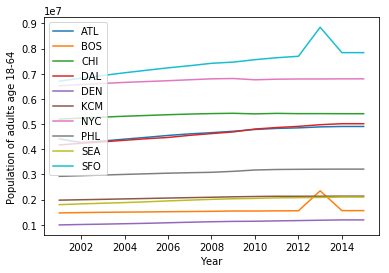

In [177]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Population age 18-64'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Population age 18-64']=SSA_agg_df['Population age 18-64'].apply(np.int64)

#separate regions
d1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Population age 18-64']]
d2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Population age 18-64']]
d3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Population age 18-64']]
d4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Population age 18-64']]
d5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Population age 18-64']]
d6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Population age 18-64']]
d7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Population age 18-64']]
d8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Population age 18-64']]
d9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Population age 18-64']]
d10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Population age 18-64']]

#reset indexes
d_list=[d1,d2,d3,d4,d5,d6,d7,d7,d8,d9,d10]
for data in d_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(d1['Date_numeric'], d1['Population age 18-64'])
_=plt.plot(d2['Date_numeric'], d2['Population age 18-64'])
_=plt.plot(d3['Date_numeric'], d3['Population age 18-64'])
_=plt.plot(d4['Date_numeric'], d4['Population age 18-64'])
_=plt.plot(d5['Date_numeric'], d5['Population age 18-64'])
_=plt.plot(d6['Date_numeric'], d6['Population age 18-64'])
_=plt.plot(d7['Date_numeric'], d7['Population age 18-64'])
_=plt.plot(d8['Date_numeric'], d8['Population age 18-64'])
_=plt.plot(d9['Date_numeric'], d9['Population age 18-64'])
_=plt.plot(d10['Date_numeric'], d10['Population age 18-64'])

_=plt.xlabel('Year')
_=plt.ylabel('Population of adults age 18-64')
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()



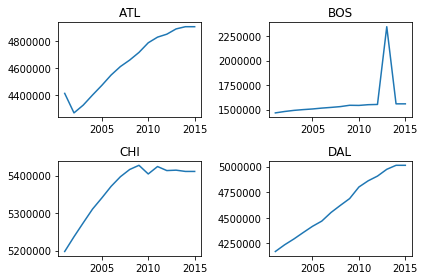

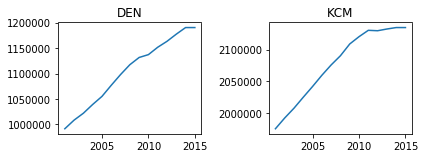

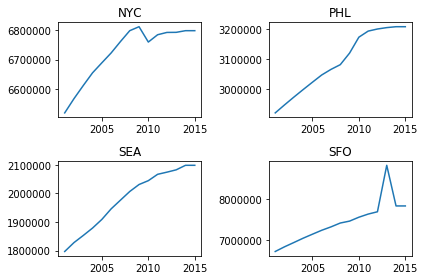

In [178]:
plt.subplot(2,2,1)
_=plt.plot(d1['Date_numeric'], d1['Population age 18-64'])
_=plt.title('ATL')

plt.subplot(2,2,2)
_=plt.plot(d2['Date_numeric'], d2['Population age 18-64'])
_=plt.title('BOS')

plt.subplot(2,2,3)
_=plt.plot(d3['Date_numeric'], d3['Population age 18-64'])
_=plt.title('CHI')

plt.subplot(2,2,4)
_=plt.plot(d4['Date_numeric'], d4['Population age 18-64'])
_=plt.title('DAL')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d5['Date_numeric'], d5['Population age 18-64'])
_=plt.title('DEN')

plt.subplot(2,2,2)
_=plt.plot(d6['Date_numeric'], d6['Population age 18-64'])
_=plt.title('KCM')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d7['Date_numeric'], d7['Population age 18-64'])
_=plt.title('NYC')

plt.subplot(2,2,2)
_=plt.plot(d8['Date_numeric'], d8['Population age 18-64'])
_=plt.title('PHL')

plt.subplot(2,2,3)
_=plt.plot(d9['Date_numeric'], d9['Population age 18-64'])
_=plt.title('SEA')

plt.subplot(2,2,4)
_=plt.plot(d10['Date_numeric'], d10['Population age 18-64'])
_=plt.title('SFO')

plt.tight_layout()
plt.show()

#Boston and San Fransisco show significant bumps in 2013.  May want to look into that.

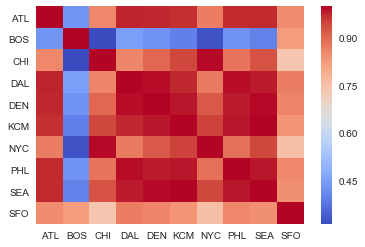

In [199]:
#plot correlations of regions

#create a dataframe with populations from all the regions
d_list_pop=[d1['Population age 18-64'], d2['Population age 18-64'], d3['Population age 18-64'],d4['Population age 18-64'],d5['Population age 18-64'],d6['Population age 18-64'],d7['Population age 18-64'],d8['Population age 18-64'],d9['Population age 18-64'],d10['Population age 18-64']]
corrs=pd.concat(d_list_pop, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')




In [213]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='Adult Population'
ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
#column='Percent of Adult Population Receiving SSA Adult Disability Benefits'



ATL Region


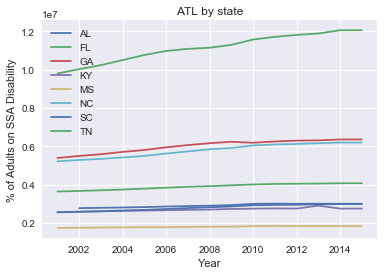

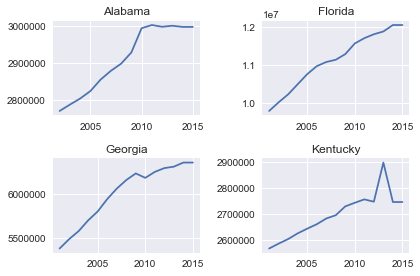

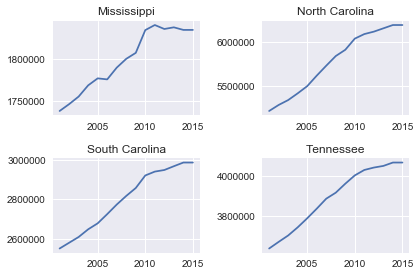

In [208]:
#ATL plots

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AL[xcolumn], AL[ycolumn])
plt.title('Alabama')

plt.subplot(2,2,2)
plt.plot(FL[xcolumn], FL[ycolumn])
plt.title('Florida')

plt.subplot(2,2,3)
plt.plot(GA[xcolumn], GA[ycolumn])
plt.title('Georgia')

plt.subplot(2,2,4)
plt.plot(KY[xcolumn], KY[ycolumn])
plt.title('Kentucky')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
plt.plot(MS[xcolumn], MS[ycolumn])
plt.title('Mississippi')

plt.subplot(2,2,2)
plt.plot(NC[xcolumn], NC[ycolumn])
plt.title('North Carolina')

plt.subplot(2,2,3)
plt.plot(SC[xcolumn], SC[ycolumn])
plt.title('South Carolina')  
    
plt.subplot(2,2,4)
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('Tennessee')
    
plt.tight_layout()
plt.show()

BOS Region


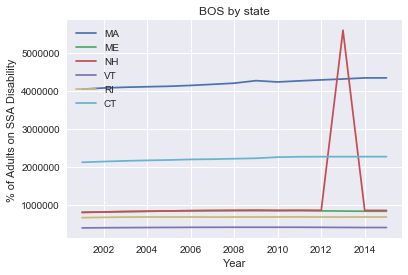

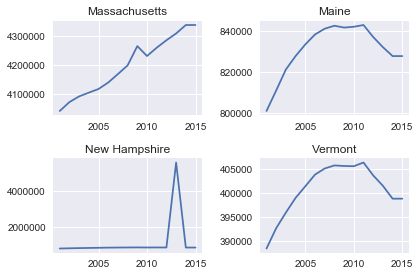

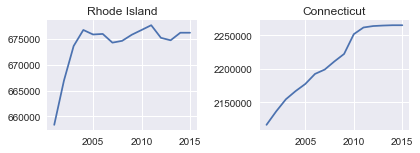

In [209]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
plt.plot(MA[xcolumn], MA[ycolumn])
plt.title('Massachusetts')

plt.subplot(2,2,2)
plt.plot(ME[xcolumn], ME[ycolumn])
plt.title('Maine')

plt.subplot(2,2,3)
plt.plot(NH[xcolumn], NH[ycolumn])
plt.title('New Hampshire')  
    
plt.subplot(2,2,4)
plt.plot(VT[xcolumn], VT[ycolumn])
plt.title('Vermont')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(RI[xcolumn], RI[ycolumn])
plt.title('Rhode Island')

plt.subplot(2,2,2)
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('Connecticut')
    
plt.tight_layout()
plt.show()

#Clearly New Hampshire has an outlier in 2013.  Supporting notes do not say if this is what 
#we would assume to be an error or a one time event.  Without knowledge otherwise, we cannot
#dismiss the anomaly.

CHI Region


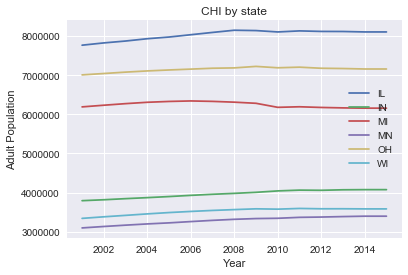

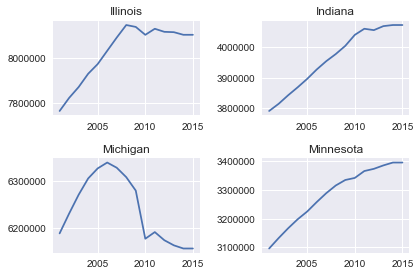

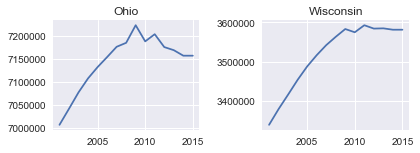

In [223]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IL[xcolumn], IL[ycolumn])
plt.title('Illinois')

plt.subplot(2,2,2)
plt.plot(IN[xcolumn], IN[ycolumn])
plt.title('Indiana')

plt.subplot(2,2,3)
plt.plot(MI[xcolumn], MI[ycolumn])
plt.title('Michigan')  
    
plt.subplot(2,2,4)
plt.plot(MN[xcolumn], MN[ycolumn])
plt.title('Minnesota')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(OH[xcolumn], OH[ycolumn])
plt.title('Ohio')

plt.subplot(2,2,2)
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('Wisconsin')
    
plt.tight_layout()
plt.show()

DAL Region


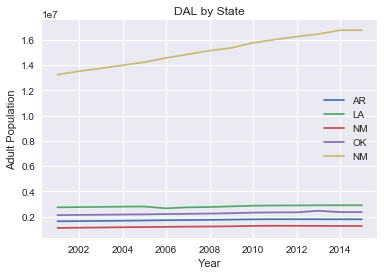

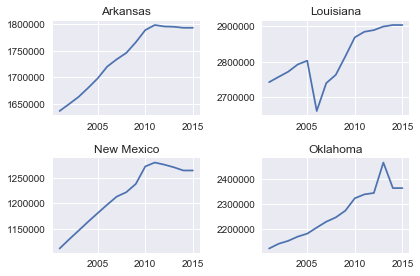

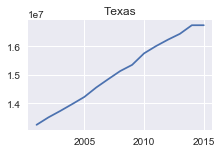

In [222]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AR[xcolumn], AR[ycolumn])
plt.title('Arkansas')

plt.subplot(2,2,2)
plt.plot(LA[xcolumn], LA[ycolumn])
plt.title('Louisiana')

plt.subplot(2,2,3)
plt.plot(NM[xcolumn], NM[ycolumn])
plt.title('New Mexico')  
    
plt.subplot(2,2,4)
plt.plot(OK[xcolumn], OK[ycolumn])
plt.title('Oklahoma')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('Texas')
    
plt.tight_layout()
plt.show()

DEN Region


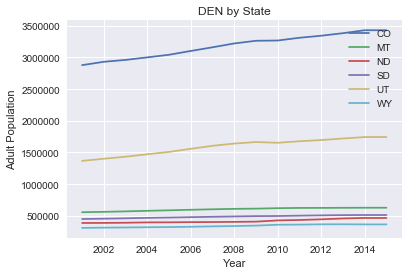

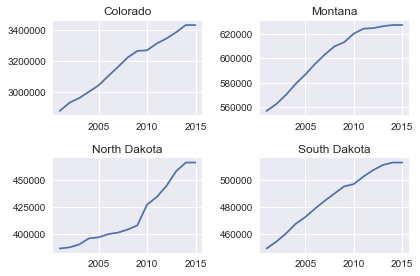

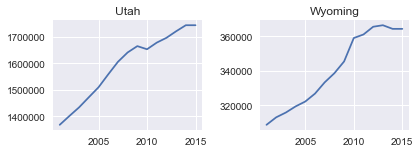

In [221]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
plt.plot(CO[xcolumn], CO[ycolumn])
plt.title('Colorado')

plt.subplot(2,2,2)
plt.plot(MT[xcolumn], MT[ycolumn])
plt.title('Montana')

plt.subplot(2,2,3)
plt.plot(ND[xcolumn], ND[ycolumn])
plt.title('North Dakota')  
    
plt.subplot(2,2,4)
plt.plot(SD[xcolumn], SD[ycolumn])
plt.title('South Dakota')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(UT[xcolumn], UT[ycolumn])
plt.title('Utah')

plt.subplot(2,2,2)
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('Wyoming')
    
plt.tight_layout()
plt.show()

KCM Region


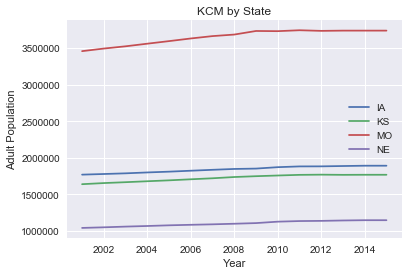

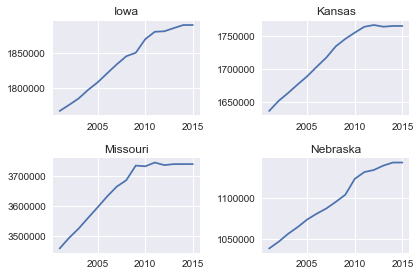

In [219]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IA[xcolumn], IA[ycolumn])
plt.title('Iowa')

plt.subplot(2,2,2)
plt.plot(KS[xcolumn], KS[ycolumn])
plt.title('Kansas')

plt.subplot(2,2,3)
plt.plot(MO[xcolumn], MO[ycolumn])
plt.title('Missouri')  
    
plt.subplot(2,2,4)
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('Nebraska')
    
plt.tight_layout()
plt.show()



NYC Region


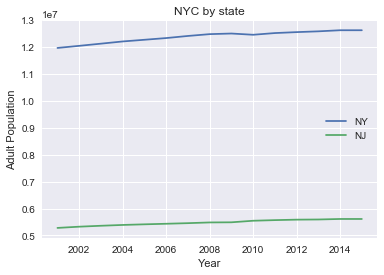

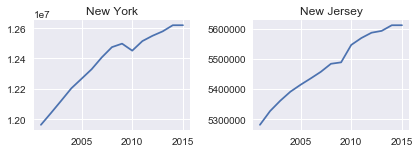

In [214]:
#NYC

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.show()

plt.subplot(2,2,1)
plt.plot(NY[xcolumn], NY[ycolumn])
plt.title('New York')

plt.subplot(2,2,2)
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('New Jersey')
    
plt.tight_layout()
plt.show()

PHL Region


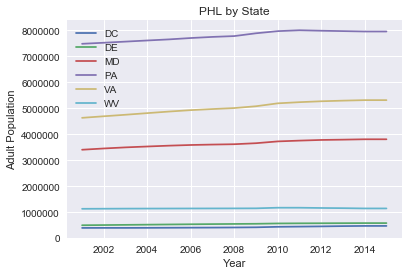

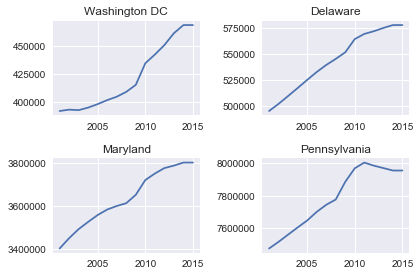

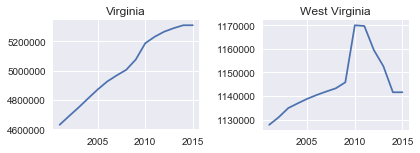

In [218]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(DC[xcolumn], DC[ycolumn])
plt.title('Washington DC')

plt.subplot(2,2,2)
plt.plot(DE[xcolumn], DE[ycolumn])
plt.title('Delaware')

plt.subplot(2,2,3)
plt.plot(MD[xcolumn], MD[ycolumn])
plt.title('Maryland') 
    
plt.subplot(2,2,4)
plt.plot(PA[xcolumn], PA[ycolumn])
plt.title('Pennsylvania')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(VA[xcolumn], VA[ycolumn])
plt.title('Virginia')

plt.subplot(2,2,2)
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('West Virginia')
    
plt.tight_layout()
plt.show()

SEA Region


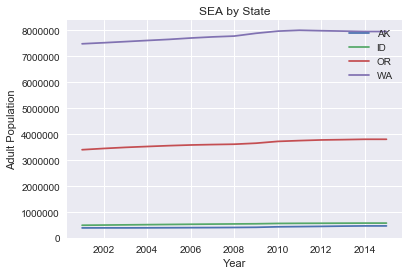

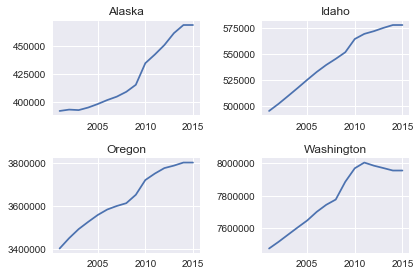

In [217]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AK[xcolumn], AK[ycolumn])
plt.title('Alaska')

plt.subplot(2,2,2)
plt.plot(ID[xcolumn], ID[ycolumn])
plt.title('Idaho')

plt.subplot(2,2,3)
plt.plot(OR[xcolumn], OR[ycolumn])
plt.title('Oregon')  
    
plt.subplot(2,2,4)
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('Washington')
    
plt.tight_layout()
plt.show()


SFO Region


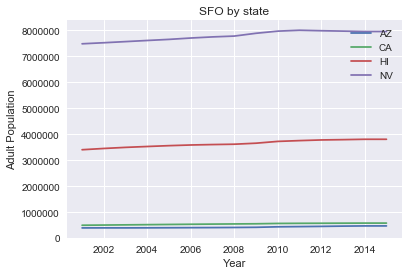

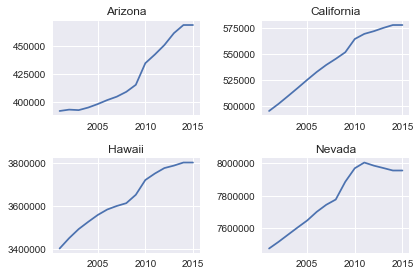

In [216]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.title('Arizona')

plt.subplot(2,2,2)
plt.plot(CA[xcolumn], CA[ycolumn])
plt.title('California')

plt.subplot(2,2,3)
plt.plot(HI[xcolumn], HI[ycolumn])
plt.title('Hawaii')  
    
plt.subplot(2,2,4)
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('Nevada')
    
plt.tight_layout()
plt.show()


In [226]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='% of Adults on SSA Disability'
#ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
ycolumn='Percent of Adult Population Receiving SSA Adult Disability Benefits'


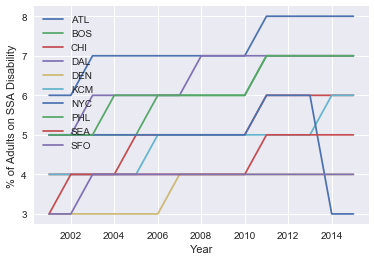

In [227]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Percent of Adult Population Receiving SSA Adult Disability Benefits'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits']=SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits'].apply(np.int64)

#separate regions
d1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
d10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]

#reset indexes
d_list=[d1,d2,d3,d4,d5,d6,d7,d7,d8,d9,d10]
for data in d_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(d1['Date_numeric'], d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d2['Date_numeric'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d3['Date_numeric'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d4['Date_numeric'], d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d5['Date_numeric'], d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d6['Date_numeric'], d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d7['Date_numeric'], d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d8['Date_numeric'], d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d9['Date_numeric'], d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(d10['Date_numeric'], d10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])

_=plt.xlabel('Year')
_=plt.ylabel(y_label)
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()

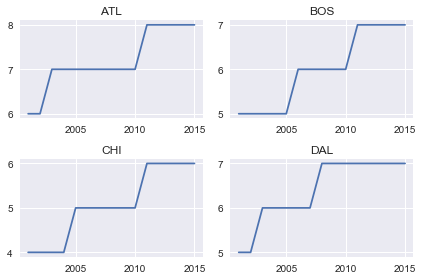

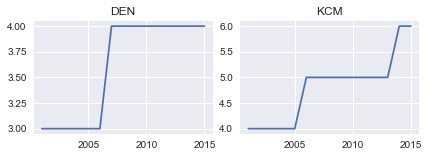

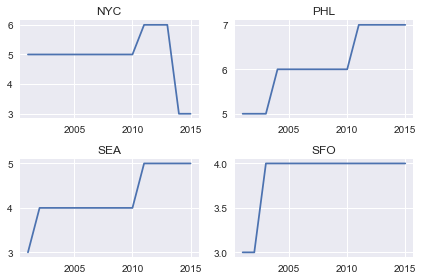

In [228]:
plt.subplot(2,2,1)
_=plt.plot(d1['Date_numeric'], d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('ATL')

plt.subplot(2,2,2)
_=plt.plot(d2['Date_numeric'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('BOS')

plt.subplot(2,2,3)
_=plt.plot(d3['Date_numeric'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('CHI')

plt.subplot(2,2,4)
_=plt.plot(d4['Date_numeric'], d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DAL')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d5['Date_numeric'], d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DEN')

plt.subplot(2,2,2)
_=plt.plot(d6['Date_numeric'], d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('KCM')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(d7['Date_numeric'], d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('NYC')

plt.subplot(2,2,2)
_=plt.plot(d8['Date_numeric'], d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('PHL')

plt.subplot(2,2,3)
_=plt.plot(d9['Date_numeric'], d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SEA')

plt.subplot(2,2,4)
_=plt.plot(d10['Date_numeric'], d10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SFO')

plt.tight_layout()
plt.show()

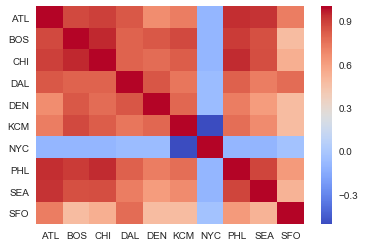

In [229]:
#plot correlations of regions

#create a dataframe with populations from all the regions
d_list_precent=[d1['Percent of Adult Population Receiving SSA Adult Disability Benefits'], d2['Percent of Adult Population Receiving SSA Adult Disability Benefits'], d3['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d4['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d5['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d6['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d7['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d8['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d9['Percent of Adult Population Receiving SSA Adult Disability Benefits'],d10['Percent of Adult Population Receiving SSA Adult Disability Benefits']]
corrs=pd.concat(d_list_precent, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')

#shown by both the graphs above and the heatmap below, the NYC Region is a 
#clear outlier since it has had a shrinking number on dissability.

ATL Region


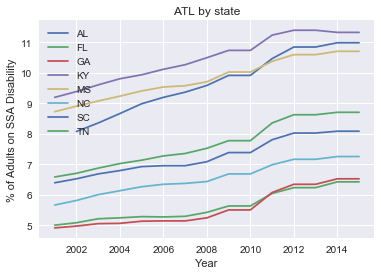

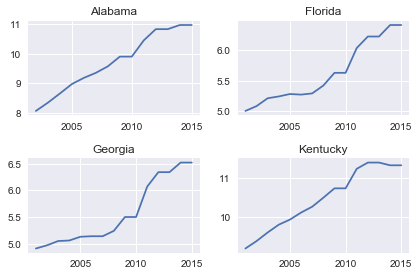

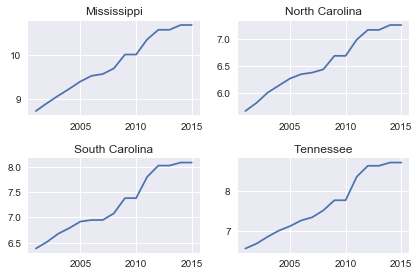

In [230]:
#ATL plots

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AL[xcolumn], AL[ycolumn])
plt.title('Alabama')

plt.subplot(2,2,2)
plt.plot(FL[xcolumn], FL[ycolumn])
plt.title('Florida')

plt.subplot(2,2,3)
plt.plot(GA[xcolumn], GA[ycolumn])
plt.title('Georgia')

plt.subplot(2,2,4)
plt.plot(KY[xcolumn], KY[ycolumn])
plt.title('Kentucky')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
plt.plot(MS[xcolumn], MS[ycolumn])
plt.title('Mississippi')

plt.subplot(2,2,2)
plt.plot(NC[xcolumn], NC[ycolumn])
plt.title('North Carolina')

plt.subplot(2,2,3)
plt.plot(SC[xcolumn], SC[ycolumn])
plt.title('South Carolina')  
    
plt.subplot(2,2,4)
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('Tennessee')
    
plt.tight_layout()
plt.show()

BOS Region


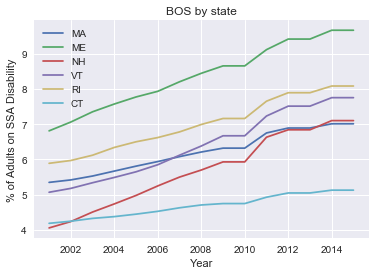

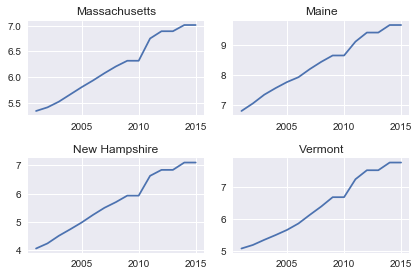

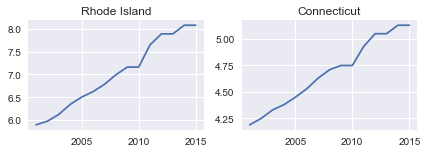

In [231]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
plt.plot(MA[xcolumn], MA[ycolumn])
plt.title('Massachusetts')

plt.subplot(2,2,2)
plt.plot(ME[xcolumn], ME[ycolumn])
plt.title('Maine')

plt.subplot(2,2,3)
plt.plot(NH[xcolumn], NH[ycolumn])
plt.title('New Hampshire')  
    
plt.subplot(2,2,4)
plt.plot(VT[xcolumn], VT[ycolumn])
plt.title('Vermont')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(RI[xcolumn], RI[ycolumn])
plt.title('Rhode Island')

plt.subplot(2,2,2)
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('Connecticut')
    
plt.tight_layout()
plt.show()


CHI Region


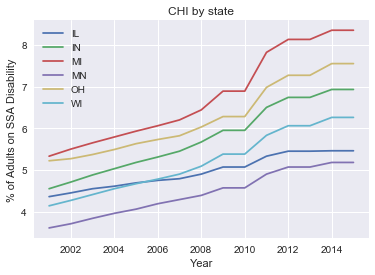

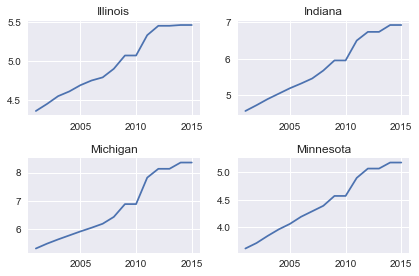

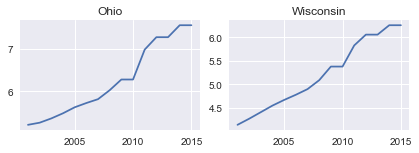

In [232]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IL[xcolumn], IL[ycolumn])
plt.title('Illinois')

plt.subplot(2,2,2)
plt.plot(IN[xcolumn], IN[ycolumn])
plt.title('Indiana')

plt.subplot(2,2,3)
plt.plot(MI[xcolumn], MI[ycolumn])
plt.title('Michigan')  
    
plt.subplot(2,2,4)
plt.plot(MN[xcolumn], MN[ycolumn])
plt.title('Minnesota')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(OH[xcolumn], OH[ycolumn])
plt.title('Ohio')

plt.subplot(2,2,2)
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('Wisconsin')
    
plt.tight_layout()
plt.show()

DAL Region


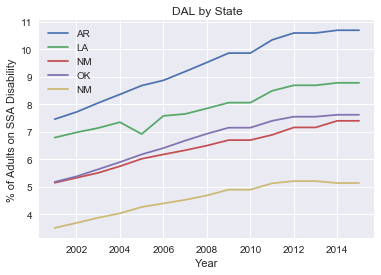

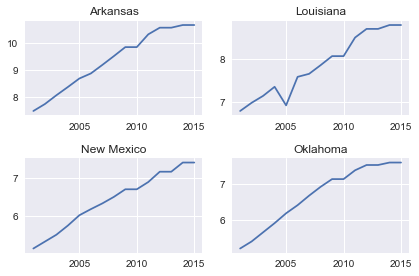

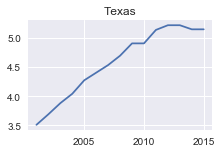

In [233]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AR[xcolumn], AR[ycolumn])
plt.title('Arkansas')

plt.subplot(2,2,2)
plt.plot(LA[xcolumn], LA[ycolumn])
plt.title('Louisiana')

plt.subplot(2,2,3)
plt.plot(NM[xcolumn], NM[ycolumn])
plt.title('New Mexico')  
    
plt.subplot(2,2,4)
plt.plot(OK[xcolumn], OK[ycolumn])
plt.title('Oklahoma')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('Texas')
    
plt.tight_layout()
plt.show()

DEN Region


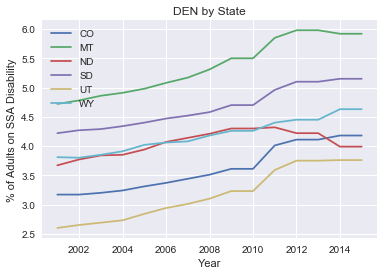

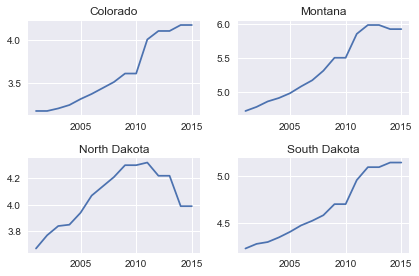

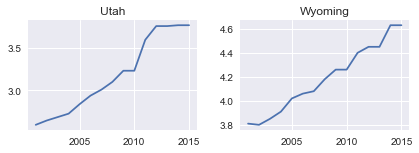

In [234]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
plt.plot(CO[xcolumn], CO[ycolumn])
plt.title('Colorado')

plt.subplot(2,2,2)
plt.plot(MT[xcolumn], MT[ycolumn])
plt.title('Montana')

plt.subplot(2,2,3)
plt.plot(ND[xcolumn], ND[ycolumn])
plt.title('North Dakota')  
    
plt.subplot(2,2,4)
plt.plot(SD[xcolumn], SD[ycolumn])
plt.title('South Dakota')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(UT[xcolumn], UT[ycolumn])
plt.title('Utah')

plt.subplot(2,2,2)
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('Wyoming')
    
plt.tight_layout()
plt.show()

KCM Region


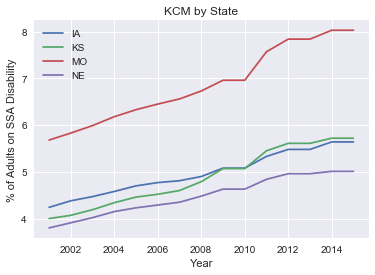

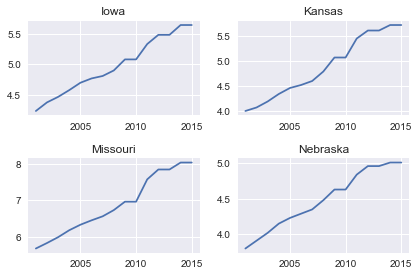

In [235]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
plt.plot(IA[xcolumn], IA[ycolumn])
plt.title('Iowa')

plt.subplot(2,2,2)
plt.plot(KS[xcolumn], KS[ycolumn])
plt.title('Kansas')

plt.subplot(2,2,3)
plt.plot(MO[xcolumn], MO[ycolumn])
plt.title('Missouri')  
    
plt.subplot(2,2,4)
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('Nebraska')
    
plt.tight_layout()
plt.show()



NYC Region


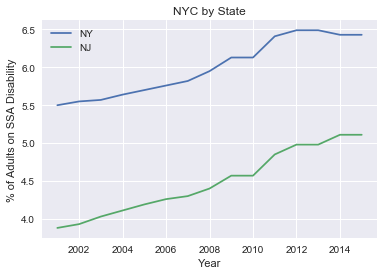

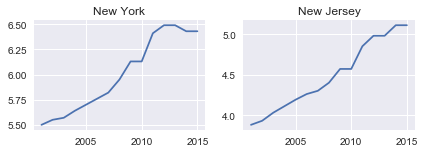

In [236]:
#NYC

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.show()

plt.subplot(2,2,1)
plt.plot(NY[xcolumn], NY[ycolumn])
plt.title('New York')

plt.subplot(2,2,2)
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('New Jersey')
    
plt.tight_layout()
plt.show()

PHL Region


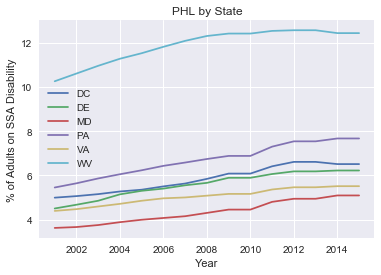

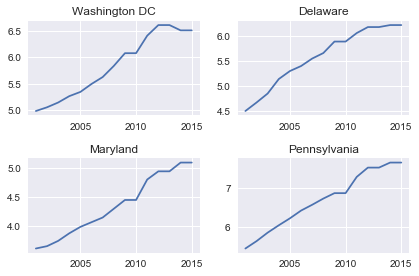

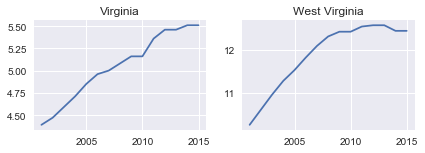

In [237]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(DC[xcolumn], DC[ycolumn])
plt.title('Washington DC')

plt.subplot(2,2,2)
plt.plot(DE[xcolumn], DE[ycolumn])
plt.title('Delaware')

plt.subplot(2,2,3)
plt.plot(MD[xcolumn], MD[ycolumn])
plt.title('Maryland') 
    
plt.subplot(2,2,4)
plt.plot(PA[xcolumn], PA[ycolumn])
plt.title('Pennsylvania')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
plt.plot(VA[xcolumn], VA[ycolumn])
plt.title('Virginia')

plt.subplot(2,2,2)
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('West Virginia')
    
plt.tight_layout()
plt.show()

SEA Region


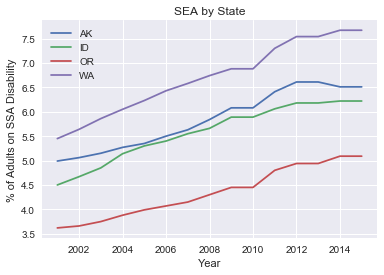

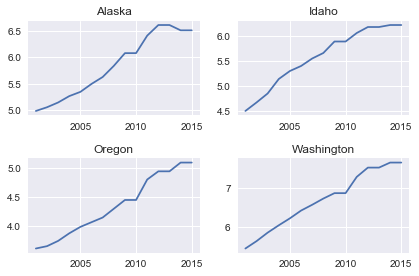

In [238]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AK[xcolumn], AK[ycolumn])
plt.title('Alaska')

plt.subplot(2,2,2)
plt.plot(ID[xcolumn], ID[ycolumn])
plt.title('Idaho')

plt.subplot(2,2,3)
plt.plot(OR[xcolumn], OR[ycolumn])
plt.title('Oregon')  
    
plt.subplot(2,2,4)
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('Washington')
    
plt.tight_layout()
plt.show()


SFO Region


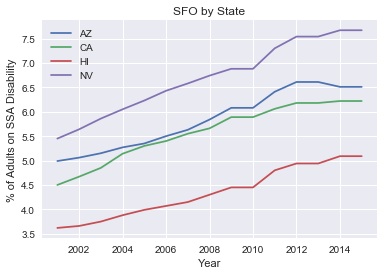

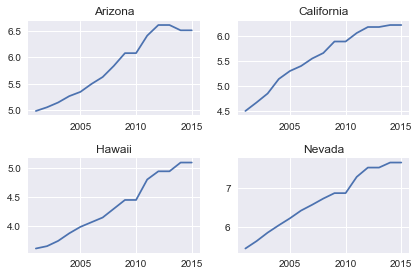

In [239]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.title('Arizona')

plt.subplot(2,2,2)
plt.plot(CA[xcolumn], CA[ycolumn])
plt.title('California')

plt.subplot(2,2,3)
plt.plot(HI[xcolumn], HI[ycolumn])
plt.title('Hawaii')  
    
plt.subplot(2,2,4)
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('Nevada')
    
plt.tight_layout()
plt.show()
